# Cracking sources of instability

Cracking is a possible instability source of compact objects when these are subjected to local density perturbations. The stability criteria is based on the sign change of the following quantities

$$ \delta \mathcal{R}_{p}=\frac{P^{\prime \prime}}{\rho^{\prime}} \delta \rho=\left[\left(v^{2}\right)^{\prime}+v^{2} \frac{\rho^{\prime \prime}}{\rho^{\prime}}\right] \delta \rho, $$

$$ \delta \mathcal{R}_{g}=\left[\frac{\partial \mathcal{R}_{g}}{\partial \rho}+\frac{\partial \mathcal{R}_{g}}{\partial P} v^{2}+\frac{\partial \mathcal{R}_{g}}{\partial m} \frac{4 \pi r^{2} \rho}{\rho^{\prime}}\right] \delta \rho,  $$

$$ \delta \mathcal{R}_{a}=2\left[\frac{v^{2}-v_{\perp}^{2}}{r}\right] \delta \rho $$
where 

$$ \frac{\partial \mathcal{R}_{g}}{\partial \rho}=\frac{m+4 \pi r^{3} P}{r(r-2 m)}, \frac{\partial \mathcal{R}_{g}}{\partial P}=\frac{m+4 \pi r^{3}(\rho+2 P)}{r(r-2 m)}, \frac{\partial \mathcal{R}_{g}}{\partial m}=\frac{(\rho+P)\left(1+8 \pi r^{2} P\right)}{(r-2 m)^{2}}   $$

and

$$ v^{2} = \frac{dP}{d\rho} \quad , \quad v_{\perp}^{2} = \frac{dP_{\perp}}{d\rho} $$

## Isotropic case

In this case $P=P_{\perp}$ so that $v=v_{\perp}$ and $\delta \mathcal{R}_{a}=0$. The possible change of sign is due to $\mathcal{R}_{p}$ and $\mathcal{R}_{g}$.

### Calculating $\delta\mathcal{R}_{p}$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib as mpl
from scipy import integrate, interpolate
from Physical_Const import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=21)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend',fontsize= 14,markerscale=1.5)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.linewidth'] = 1.0

Loading a model to play with

In [2]:
model1 = np.loadtxt('results/alf1/14.5.dat',unpack=True)

Taking first and second order derivatives of $\rho$

In [3]:
s1=1e-20
model1drho=interpolate.UnivariateSpline(model1[-1], model1[2], k=3, s=s1).derivative(n=1)
s2=1e-7
model1ddrho=interpolate.UnivariateSpline(model1[-1], model1[2], k=5, s=s2).derivative(n=2)

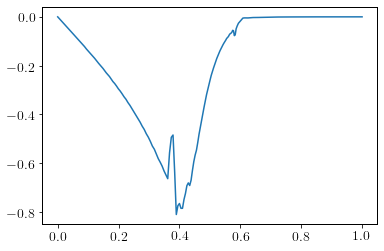

In [4]:
plt.plot(model1[-1]/model1[-1][-1],model1drho(model1[-1]))

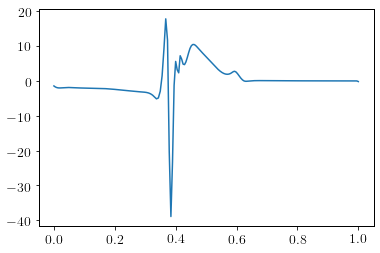

In [5]:
plt.plot(model1[-1]/model1[-1][-1],model1ddrho(model1[-1]))

Now using one of the TOV equations to find the first derivative of $P$

$$ \frac{\mathrm{d} P}{\mathrm{d} r}=-(P+\rho) \frac{m+4 \pi P r^{3}}{r(r-2 m)} $$

In [6]:
model1dP = -(model1[1]+model1[2])*((model1[0]+4*np.pi*model1[1]*(model1[-1]**3))/(model1[-1]*(model1[-1]-2*model1[0])))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Alternate way to compute $\rho^{\prime}$

$$ \frac{d\rho}{dr} = \frac{d\rho}{dP}\frac{dP}{dr} $$

Loading the EOS

In [9]:
rhoalf1,Palf1=np.loadtxt('EOS/alf1.dat',usecols=(2,1),unpack=True)
def P_alf1(rho):
    logP=interpolate.interp1d(np.log10(rhoalf1/rhodim),np.log10((Palf1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_alf1(P):
    logrho=interpolate.interp1d(np.log10((Palf1*c**2)/Pdim),np.log10(rhoalf1/rhodim))
    return 10.0**logrho(np.log10(P))

In [17]:
vsquared1=interpolate.UnivariateSpline(rhoalf1, Palf1, k=3, s=0).derivative(n=1)

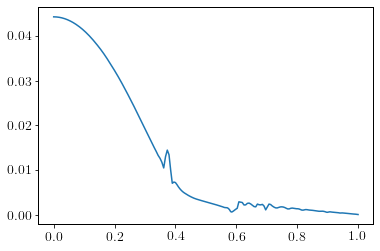

In [19]:
plt.plot(model1[-1]/model1[-1][-1],vsquared1(model1[2]*rhodim))

In [20]:
model1drho_alt = model1dP/vsquared1(model1[2]*rhodim)

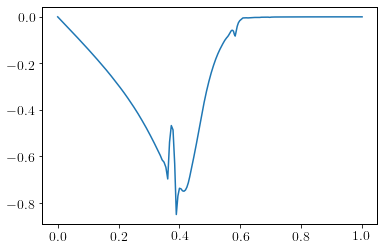

In [21]:
plt.plot(model1[-1]/model1[-1][-1],model1drho_alt)

In [43]:
model1ddrho_alt = interpolate.UnivariateSpline(np.delete(model1[-1],0), np.delete(model1drho_alt,0), k=3, s=0).derivative(n=1)

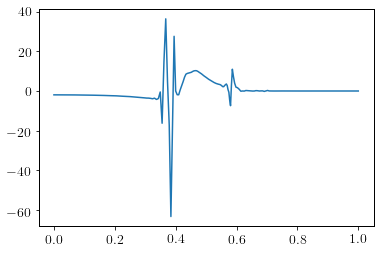

In [44]:
plt.plot(model1[-1]/model1[-1][-1],model1ddrho_alt(model1[-1]))

Alternate $(v^2)'$

In [46]:
model1dvs_alt = interpolate.UnivariateSpline(np.delete(model1[-1],0), np.delete(vsquared1(model1[2]*rhodim),0), k=3, s=0).derivative(n=1)

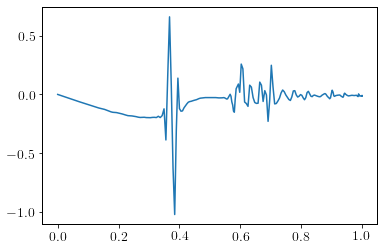

In [47]:
plt.plot(model1[-1]/model1[-1][-1],model1dvs_alt(model1[-1]))

In [49]:
dRp_alt = model1dvs_alt(np.delete(model1[-1],0)) + np.delete(vsquared1(model1[2]*rhodim),0)*(model1ddrho_alt(np.delete(model1[-1],0)))/(np.delete(model1drho_alt,0))

(-1, 1)

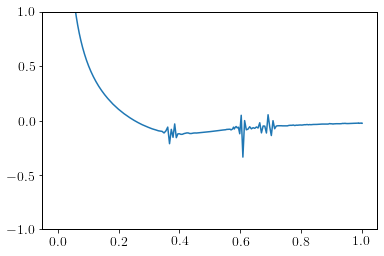

In [51]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],dRp_alt)
plt.ylim(-1,1)

Now the speed of sound

In [116]:
model1vs = model1dP/model1drho(model1[-1])

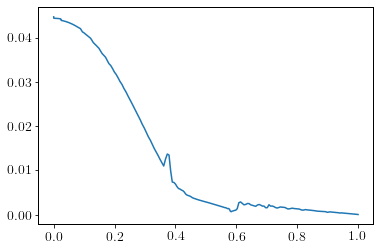

In [117]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],np.delete(model1vs,0))

Finally the first derivative of $v^{2}$

In [118]:
s3 = 1e-5
model1dvs = interpolate.UnivariateSpline(np.delete(model1[-1],0), np.delete(model1vs,0), k=3, s=s3).derivative(n=1)

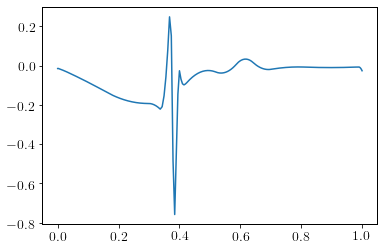

In [119]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],model1dvs(np.delete(model1[-1],0)))

With these results $\delta\mathcal{R}_{p}$ can be calculated

In [128]:
dRp = model1dvs(np.delete(model1[-1],0)) + np.delete(model1vs,0)*(np.delete(model1ddrho(model1[-1]),0)/np.delete(model1drho(model1[-1]),0)) 

(-1, 1)

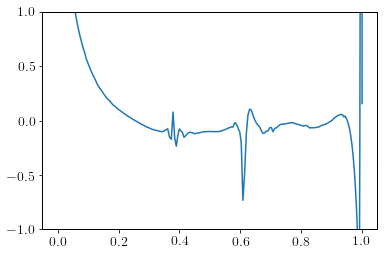

In [129]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],dRp)
plt.ylim(-1,1)

### Calculating $\delta\mathcal{R}_{p}$

In [122]:
dRgdrho = (model1[0]+4*np.pi*model1[1]*(model1[-1]**3))/(model1[-1]*(model1[-1]-2*model1[0]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [123]:
dRgdP = (model1[0]+4*np.pi*(model1[-1]**3)*(model1[2]+2*model1[1]))/(model1[-1]*(model1[-1]-2*model1[0]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [124]:
dRgdm = ((model1[1]+model1[2])*(1+8*np.pi*(model1[-1]**2)*model1[1]))/((model1[-1]-2*model1[0])**2)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [125]:
dRg = dRgdrho + dRgdP*model1vs + dRgdm*((4*np.pi*(model1[-1]**2)*model1[2])/(model1drho(model1[-1])))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


(-1, 1)

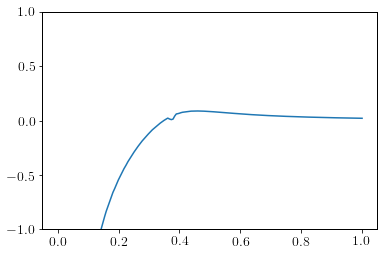

In [134]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],np.delete(dRg,0))
plt.ylim(-1,1)

Both contributions to $\delta \mathcal{R}$ have big values close the center of the object

In [137]:
dR = np.delete(dRg,0) + dRp

(-1, 1)

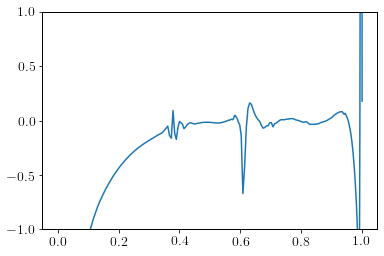

In [140]:
plt.plot(np.delete(model1[-1],0)/model1[-1][-1],dR)
plt.ylim(-1,1)